In [2]:
import scipy.stats as sts
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import expon, norm

[Экспоненциальное распределение](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

In [7]:
# зададим среднее (mu) и среднеквадратичное отклонение (sigma)
lamb = 0.5
sigma = 0.5

mean = 1/lamb
variance = 1/lamb**2

In [8]:
# создали объект распредления
rv = expon(loc = sigma, scale = mean)
# Создадим выборку размером 1000
sample = rv.rvs(1000);

In [9]:
x = np.linspace(min(sample), max(sample), 1000)
y = [rv.pdf(i) for i in x]
# Построим гистограмму распределения и теоретическую плотность распределения    
fig, ax = plt.subplots(1, 1)

ax.hist(sample, density=True, histtype='stepfilled', alpha=0.5, bins=30);
ax.plot(x, y, 'r-', lw=5, alpha=0.6);

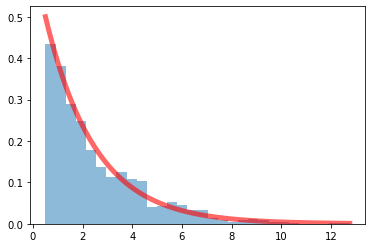

In [10]:
# Функция для получения выборочных средник 1000 выборок разных размеров (n)
def means(n):
    means = []
    for i in range(1000):
        num = rv.rvs(n)
        means.append(sum(num)/len(num))
    return means

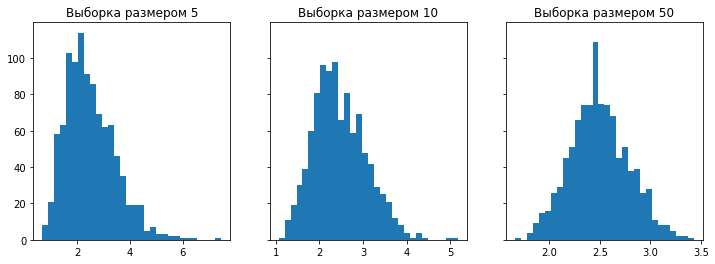

In [11]:
# Построим распределение выборочных средних
_, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize=(12,4))
ax1.set_title('Выборка размером 5')
ax1.hist(means(5), bins = 30)
ax2.set_title('Выборка размером 10')
ax2.hist(means(10), bins = 30)
ax3.set_title('Выборка размером 50')
ax3.hist(means(50), bins = 30);

In [21]:
# Создаем нормальное распределение нужных параметром
def norm_rv(n):
    return norm(loc=sigma + mean, scale=np.sqrt(variance/ n))

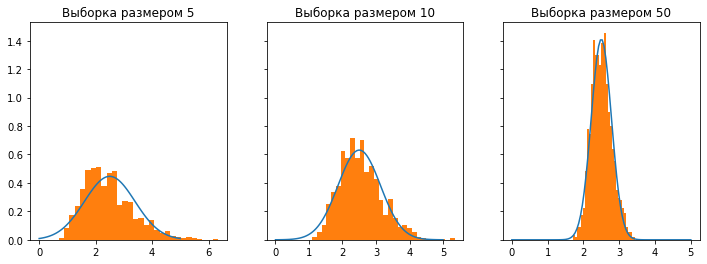

In [24]:
# Построим распределение выборочных средних
_, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize=(12,4))

x = np.linspace(0,5,100)

ax1.plot(x, norm_rv(5).pdf(x))
ax1.set_title('Выборка размером 5')
ax1.hist(means(5), bins = 30, density=True)

ax2.plot(x, norm_rv(10).pdf(x))
ax2.set_title('Выборка размером 10')
ax2.hist(means(10), bins = 30, density=True)

ax3.plot(x, norm_rv(50).pdf(x))
ax3.set_title('Выборка размером 50')
ax3.hist(means(50), bins = 30, density=True);

Чем больше выборка тем уже нормальное распределение.